len: 237
554


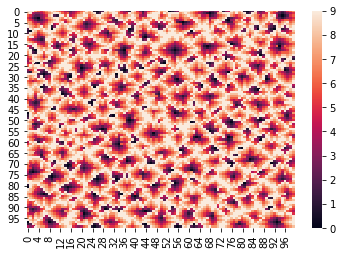

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def smoke_detector(file):
    file_contents = file.read().split('\n')
    sea_floor_str = [list(spot) for spot in file_contents]
    sea_floor = np.array(sea_floor_str).astype(int)
    #print(sea_floor)
    list_of_low_points = []
    for i, pos_y in enumerate(sea_floor):
        for j, pos_x in enumerate(pos_y):
            current = sea_floor[i][j]
            if i > 0:
                up = sea_floor[i-1][j]
            else:
                up = current+1
            if i < len(sea_floor)-1:
                down = sea_floor[i+1][j]
            else:
                down = current+1
            if j > 0:
                left = sea_floor[i][j-1]
            else:
                left = current+1
            if j < len(sea_floor[0])-1:
                right = sea_floor[i][j+1]
            else:
                right = current+1
            
            if current < up and current < down and current < left and current < right:
                list_of_low_points.append(current)
                #print("woop", current)
    print(f"len: {len(list_of_low_points)}")
    output = sum(list_of_low_points) + len(list_of_low_points)
    sns.heatmap(sea_floor)
    print(output)
    return output

file = open('basin.txt', 'r')
smoke_detector(file)
file.close()

In [82]:
import numpy as np

def smoke_detector_part2(file):
    file_contents = file.read().split('\n')
    sea_floor_str = [list(spot) for spot in file_contents]
    sea_floor = np.array(sea_floor_str).astype(int)
    basin_dict = {}
    for i, pos_y in enumerate(sea_floor):
        for j, pos_x in enumerate(pos_y):
            current = sea_floor[i][j]
            if i > 0:
                up = sea_floor[i-1][j]
            else:
                up = current+1
            if i < len(sea_floor)-1:
                down = sea_floor[i+1][j]
            else:
                down = current+1
            if j > 0:
                left = sea_floor[i][j-1]
            else:
                left = current+1
            if j < len(sea_floor[0])-1:
                right = sea_floor[i][j+1]
            else:
                right = current+1
            
            if current < up and current < down and current < left and current < right:
                basin_dict[str(i) + "," +str(j)] = 0
    
    print(basin_dict)
    for basin_name in basin_dict.keys():
        
        basin_nodes = []
        visited_nodes = []
        queue = []
        
        seed_node = basin_name

        queue = add_neigh_to_queue(seed_node, queue, visited_nodes, sea_floor) #add neightbors to queue if not 9
        visited_nodes.append(seed_node)
        basin_nodes.append(seed_node)
        
        while len(queue) != 0:
            #print("queue",queue)
            #print("visisted",visited_nodes)
            node = queue.pop()
            visited_nodes.append(node)
            queue = add_neigh_to_queue(node, queue, visited_nodes, sea_floor) #add neightbors to queue if not 9
            basin_nodes.append(node)

        
        basin_size = len(basin_nodes)
        basin_dict[basin_name] = basin_size
        print("nodes",basin_nodes)
        print(f"****************** {basin_name} COMPLETE, SIZE {basin_size} ************************")
    print(f"****************** ALL COMPLETE *********************************")    
    sorted_basin_dict = {k: v for k, v in sorted(basin_dict.items(), key=lambda item: item[1])}
    print(sorted_basin_dict)

    
def add_neigh_to_queue(node, queue, visited_nodes, sea_floor):
    node = node.split(',')
    
    i = int(node[0])
    j = int(node[1])
    
    stuff_to_add_to_queue = []
    
    if i > 0:
        up = sea_floor[i-1][j]
        s_up = str(i-1) + "," + str(j)
        if up != 9:
            if s_up not in visited_nodes and s_up not in queue: 
                stuff_to_add_to_queue.append(s_up)
            
    if i < len(sea_floor)-1:
        down = sea_floor[i+1][j]
        s_down = str(i+1) + "," + str(j)
        if down != 9:
            if s_down not in visited_nodes and s_down not in queue:
                stuff_to_add_to_queue.append(s_down)
            
    if j > 0:
        left = sea_floor[i][j-1]
        s_left = str(i) + "," + str(j-1)
        if left != 9:
            if s_left not in visited_nodes and s_left not in queue:
                stuff_to_add_to_queue.append(s_left)
            
    if j < len(sea_floor[0])-1:
        right = sea_floor[i][j+1]
        s_right = str(i) + "," + str(j+1)
        if right != 9:
            if s_right not in visited_nodes and s_right not in queue:
                stuff_to_add_to_queue.append(s_right)
                
    return stuff_to_add_to_queue + queue


        
file = open('basin.txt', 'r')
smoke_detector_part2(file)
file.close()

{'0,16': 0, '0,26': 0, '0,38': 0, '0,43': 0, '0,53': 0, '0,73': 0, '0,82': 0, '0,87': 0, '1,68': 0, '2,11': 0, '2,50': 0, '2,95': 0, '3,4': 0, '4,33': 0, '4,75': 0, '4,82': 0, '5,14': 0, '5,58': 0, '6,22': 0, '7,49': 0, '8,9': 0, '8,38': 0, '8,86': 0, '8,92': 0, '8,95': 0, '9,1': 0, '9,52': 0, '9,61': 0, '9,71': 0, '9,81': 0, '10,13': 0, '10,30': 0, '11,83': 0, '12,44': 0, '13,5': 0, '13,17': 0, '14,87': 0, '15,23': 0, '15,76': 0, '16,11': 0, '16,67': 0, '16,94': 0, '18,3': 0, '18,16': 0, '18,30': 0, '18,36': 0, '18,55': 0, '19,44': 0, '20,87': 0, '21,6': 0, '21,70': 0, '22,62': 0, '22,74': 0, '22,96': 0, '22,99': 0, '23,0': 0, '23,8': 0, '23,46': 0, '24,4': 0, '24,51': 0, '24,68': 0, '25,29': 0, '25,86': 0, '25,92': 0, '26,20': 0, '26,43': 0, '26,78': 0, '27,36': 0, '27,64': 0, '27,96': 0, '28,1': 0, '28,27': 0, '28,50': 0, '28,75': 0, '29,6': 0, '29,33': 0, '30,16': 0, '30,41': 0, '30,80': 0, '31,56': 0, '31,70': 0, '31,89': 0, '32,2': 0, '33,44': 0, '34,65': 0, '34,75': 0, '35,5': 0